In [1]:
from exp import *

In [2]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [15]:
dm = DatasetManager('2019',321 ,700,'2018')

In [17]:
test = DatasetManager('2018',321,'all','2018')

In [18]:
def get_ben_path(aPath): return aPath.parent / ('ben_' +aPath.name)

In [19]:
test.generate_dataset('test_images')

PosixPath('2018_test_images_resized_to_321_picked_all_training_for_2018')

In [16]:
dm.generate_dataset('train_images')

PosixPath('2019_train_images_resized_to_321_picked_700_training_for_2018')

In [21]:
test.get_dataset_path('test_images')

PosixPath('2018_test_images_resized_to_321_picked_all_training_for_2018')

In [87]:
def reload_dataset(dm,seed=1):
    random_seed(seed,True)
    tfms = get_transforms(flip_vert=True, max_rotate=180,max_zoom=1.3, max_lighting=0.3,p_affine=1, max_warp=0)

    data = ImageList.from_folder(dm.get_dataset_path('train_images'))\
    .split_by_rand_pct()\
    .label_from_func(dm.get_label_for_image_path)\
    .transform(tfms,size=321)\
    .databunch(bs=16)\
    .normalize(imagenet_stats)
    return data

data = reload_dataset(dm)

In [117]:
def reload_dataset_ben(dm,segmented=False, seed=1):
    random_seed(seed,True)
    tfms = get_transforms(flip_vert=True, max_rotate=180,max_zoom=1.3, max_lighting=0,p_affine=1, max_warp=0)

    data = ImageList.from_folder(get_ben_path(dm.get_dataset_path('train_images')))\
    .split_by_rand_pct()\
    .label_from_func(dm.get_label_for_image_path)\
    .transform(tfms,size=224)\
    .databunch(bs=16)\
    .normalize(imagenet_stats)
    return data

data = reload_dataset_ben(dm)

In [28]:
#añadir oversampling callback y weight decay 

In [25]:
train_count,valid_count = pd.value_counts(data.train_ds.y.items),pd.value_counts(data.valid_ds.y.items)
train_count.index,valid_count.index = [data.classes[i] for i in train_count.index],[data.classes[i] for i in valid_count.index]

print('train_count: \n',train_count,'\n\n','valid_count: \n', valid_count)
print('ratios:')
print(valid_count / train_count, '%')

train_count: 
 MEL     562
NV      559
BKL     559
BCC     557
AK      551
DF      204
VASC    202
dtype: int64 

 valid_count: 
 AK      149
BCC     143
NV      141
BKL     141
MEL     138
VASC     51
DF       35
dtype: int64
ratios:
AK      0.270417
BCC     0.256732
BKL     0.252236
DF      0.171569
MEL     0.245552
NV      0.252236
VASC    0.252475
dtype: float64 %


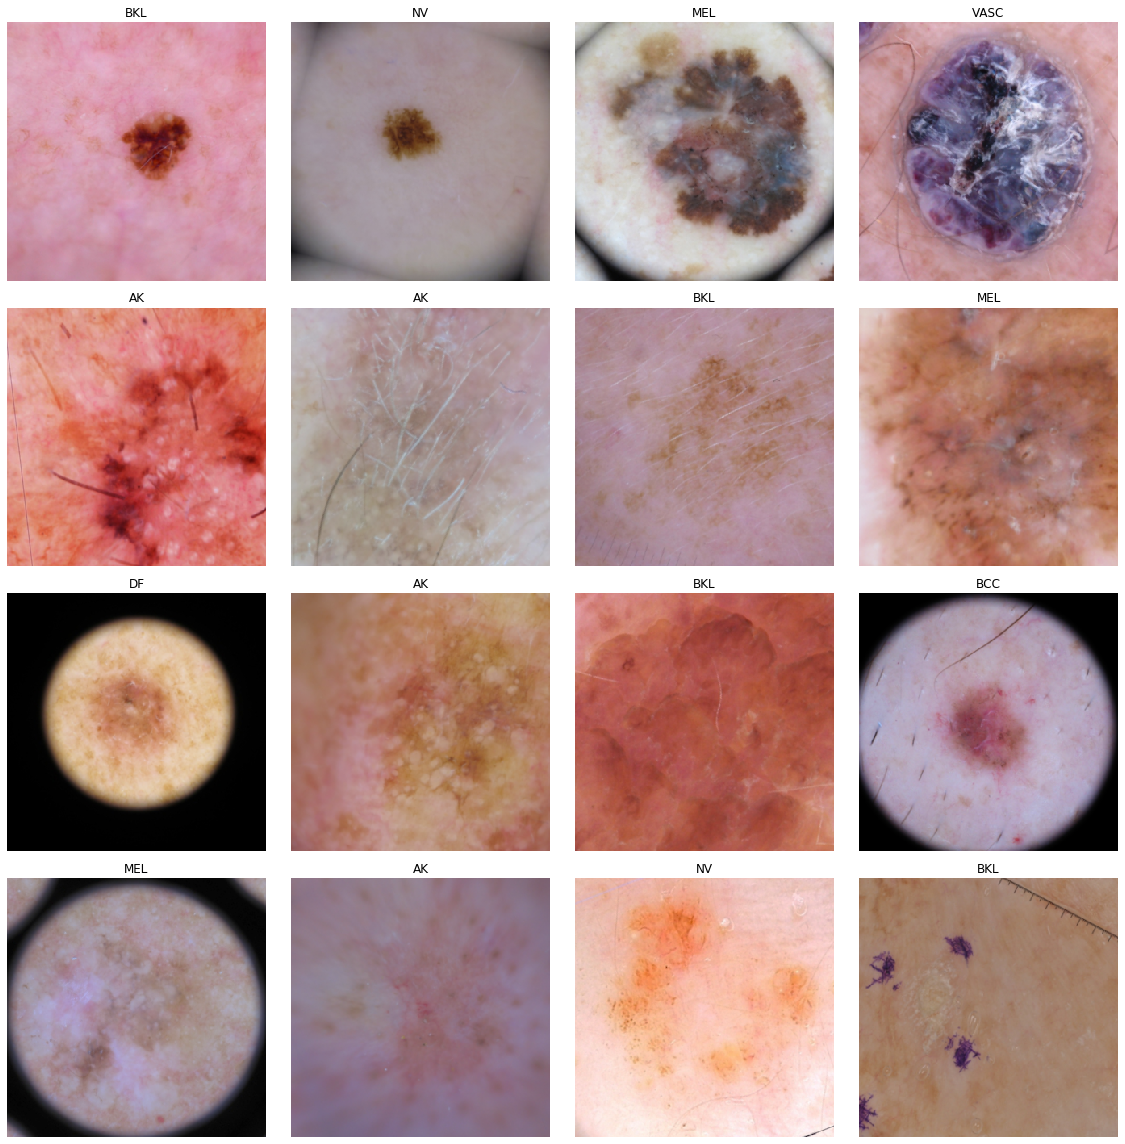

In [26]:
data.show_batch()

### Imports

In [27]:
import geffnet
from geffnet.efficientnet_builder import *

import types

In [28]:
DepthwiseSeparableConv and InvertedResidual and True

True

# EfficientNet baseline 

In [99]:
data = reload_dataset(dm)

model = geffnet.efficientnet_b3(pretrained=True, as_sequential=True)
random_seed(1,True)
# learn = cnn_learner(data, lambda x: model,pretrained=True, metrics=[error_rate,accuracy],
#                         callback_fns=[ShowGraph,OverSamplingCallback])

learn = cnn_learner(data, models.densenet201, metrics=[error_rate,accuracy],
                        callback_fns=[ShowGraph,OverSamplingCallback])




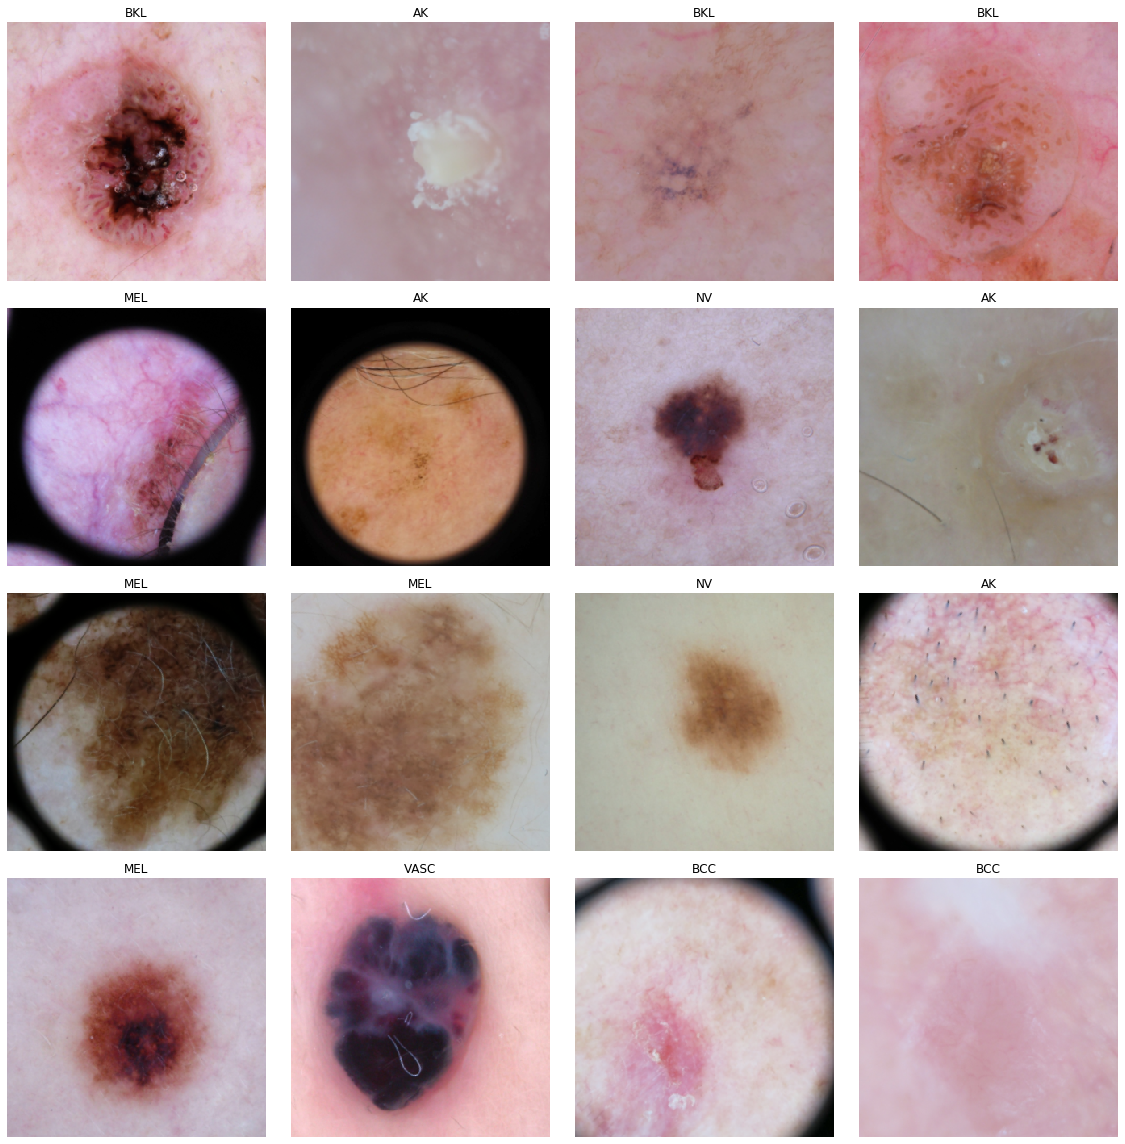

In [100]:
data.show_batch()

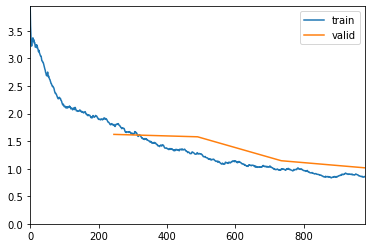

In [101]:
random_seed(1,True)
#densenet-b3 sin ben graham con wd y con oversampling y con imagenet_stats y 321 pixels
# learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(3e-03))

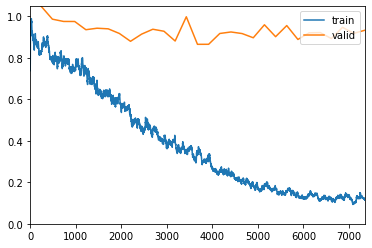

Better model found at epoch 0 with accuracy value: 0.6115288138389587.
Better model found at epoch 1 with accuracy value: 0.6265664100646973.
Better model found at epoch 2 with accuracy value: 0.6353383660316467.
Better model found at epoch 3 with accuracy value: 0.6453633904457092.
Better model found at epoch 4 with accuracy value: 0.6716791987419128.
Better model found at epoch 5 with accuracy value: 0.6729323267936707.
Better model found at epoch 8 with accuracy value: 0.7117794752120972.
Better model found at epoch 16 with accuracy value: 0.713032603263855.
Better model found at epoch 17 with accuracy value: 0.7205513715744019.
Better model found at epoch 18 with accuracy value: 0.7230576276779175.
Better model found at epoch 23 with accuracy value: 0.7518796920776367.


In [102]:
learn.save('densenet-321-pixels')
learn.unfreeze()
learn.fit_one_cycle(30, max_lr=slice(3e-04), wd=0.1, callbacks=[SaveModelCallback(learn,monitor='accuracy')])
learn.save('densenet-321-pixels-stage-2')


In [103]:
learn.load('bestmodel')

Learner(data=ImageDataBunch;

Train: LabelList (3194 items)
x: ImageList
Image (3, 321, 321),Image (3, 321, 321),Image (3, 321, 321),Image (3, 321, 321),Image (3, 321, 321)
y: CategoryList
BCC,BCC,NV,VASC,NV
Path: 2019_train_images_resized_to_321_picked_700_training_for_2018;

Valid: LabelList (798 items)
x: ImageList
Image (3, 321, 321),Image (3, 321, 321),Image (3, 321, 321),Image (3, 321, 321),Image (3, 321, 321)
y: CategoryList
BKL,DF,BKL,DF,BCC
Path: 2019_train_images_resized_to_321_picked_700_training_for_2018;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace=True)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchN

In [104]:
interp = ClassificationInterpretation.from_learner(learn)

ValueError: only one element tensors can be converted to Python scalars

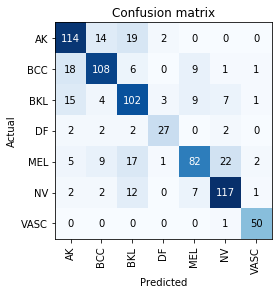

In [105]:
interp.plot_confusion_matrix()

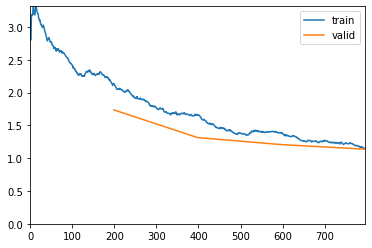

In [72]:
random_seed(1,True)
#efficientnet-b3 sin ben graham con wd y sin oversampling y con imagenet_stats y 321 pixels
# learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(3e-03))

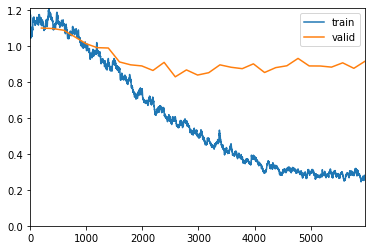

Better model found at epoch 0 with accuracy value: 0.572681725025177.
Better model found at epoch 1 with accuracy value: 0.5789473652839661.
Better model found at epoch 2 with accuracy value: 0.5889724493026733.
Better model found at epoch 3 with accuracy value: 0.61654132604599.
Better model found at epoch 5 with accuracy value: 0.6340852379798889.
Better model found at epoch 6 with accuracy value: 0.6353383660316467.
Better model found at epoch 7 with accuracy value: 0.6654135584831238.
Better model found at epoch 8 with accuracy value: 0.6779448390007019.
Better model found at epoch 10 with accuracy value: 0.6879699230194092.
Better model found at epoch 12 with accuracy value: 0.689223051071167.
Better model found at epoch 14 with accuracy value: 0.7042606472969055.
Better model found at epoch 19 with accuracy value: 0.7142857313156128.
Better model found at epoch 20 with accuracy value: 0.7205513715744019.
Better model found at epoch 21 with accuracy value: 0.7255638837814331.
Bett

In [73]:
learn.save('efficientnetb3-321-pixels')
learn.unfreeze()
learn.fit_one_cycle(30, max_lr=slice(3e-04), wd=0.1, callbacks=[SaveModelCallback(learn,monitor='accuracy')])

In [74]:
learn.load('bestmodel')

Learner(data=ImageDataBunch;

Train: LabelList (3194 items)
x: ImageList
Image (3, 321, 321),Image (3, 321, 321),Image (3, 321, 321),Image (3, 321, 321),Image (3, 321, 321)
y: CategoryList
BCC,BCC,NV,VASC,NV
Path: 2019_train_images_resized_to_321_picked_700_training_for_2018;

Valid: LabelList (798 items)
x: ImageList
Image (3, 321, 321),Image (3, 321, 321),Image (3, 321, 321),Image (3, 321, 321),Image (3, 321, 321)
y: CategoryList
BKL,DF,BKL,DF,BCC
Path: 2019_train_images_resized_to_321_picked_700_training_for_2018;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 40, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): SwishJit()
    (3): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(40, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=40, bias=False)
        (bn1): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True,

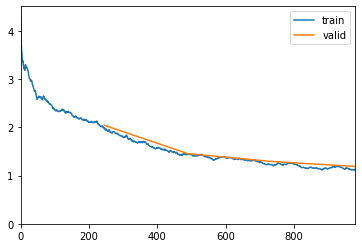

In [84]:
random_seed(1,True)
#efficientnet-b3 sin ben graham con wd y con oversampling y con imagenet_stats y 321 pixels
# learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(3e-03))

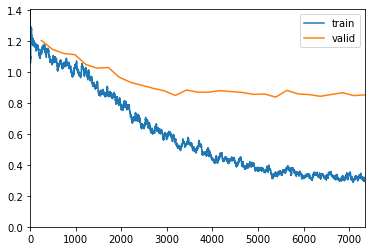

Better model found at epoch 0 with accuracy value: 0.548872172832489.
Better model found at epoch 1 with accuracy value: 0.5714285969734192.
Better model found at epoch 2 with accuracy value: 0.5776942372322083.
Better model found at epoch 3 with accuracy value: 0.5802004933357239.
Better model found at epoch 4 with accuracy value: 0.591478705406189.
Better model found at epoch 5 with accuracy value: 0.6077694296836853.
Better model found at epoch 6 with accuracy value: 0.6203007698059082.
Better model found at epoch 7 with accuracy value: 0.6416040062904358.
Better model found at epoch 8 with accuracy value: 0.6616541147232056.
Better model found at epoch 10 with accuracy value: 0.6716791987419128.
Better model found at epoch 11 with accuracy value: 0.6791979670524597.
Better model found at epoch 12 with accuracy value: 0.6829574108123779.
Better model found at epoch 13 with accuracy value: 0.6854636669158936.
Better model found at epoch 14 with accuracy value: 0.7055137753486633.
Bet

In [85]:
learn.save('efficientnetb3-321-pixels')
learn.unfreeze()
learn.fit_one_cycle(30, max_lr=slice(3e-04), wd=0.1, callbacks=[SaveModelCallback(learn,monitor='accuracy')])

In [57]:
learn.save('b3-321')

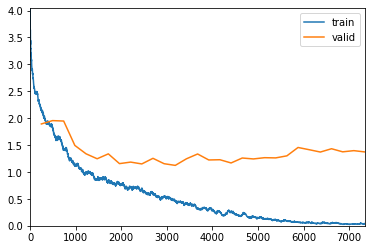

In [122]:
random_seed(1,True)
#efficientnet-b3 con ben graham con wd y con oversampling y con imagenet_stats
learn.unfreeze()
learn.fit_one_cycle(30, max_lr=slice(3e-03), wd=0.1)

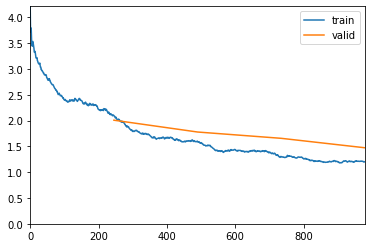

Better model found at epoch 0 with accuracy value: 0.3909774422645569.
Better model found at epoch 1 with accuracy value: 0.39974936842918396.
Better model found at epoch 3 with accuracy value: 0.448621541261673.


In [91]:
random_seed(1,True)
learn.fit_one_cycle(4, max_lr=slice(3e-03),callbacks=[SaveModelCallback(learn,monitor='accuracy')])

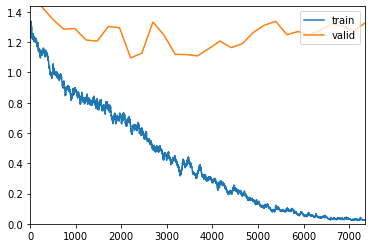

In [92]:
#efficientnet-b3 con ben graham con wd y con oversampling
learn.unfreeze()
learn.fit_one_cycle(30, max_lr=slice(3e-03), wd=0.1)

In [93]:
learn.save('efficientnet_b3_with_ben_224_30_epochs')

In [ ]:
#efficientnet-b3 sin ben graham con wd y con oversampling llegaba a .72d


In [71]:
# learn.save('efficientnet_b3_without_ben_224_30_epochs',return_path=True)

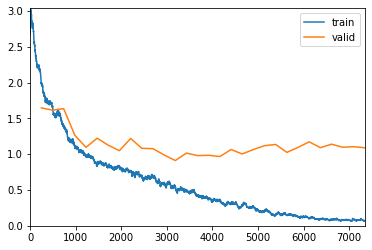

In [34]:
#efficientnet-b0
learn.unfreeze()
learn.fit_one_cycle(30, max_lr=slice(3e-03), wd=0.1)

# Predict

In [58]:
interp = ClassificationInterpretation.from_learner(learn)

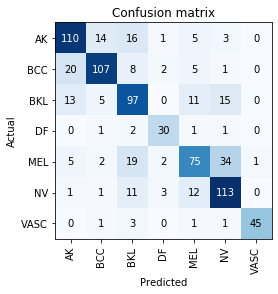

In [54]:
interp.plot_confusion_matrix()

In [106]:
learn.export('new_submitter_1')

In [107]:
predictor = load_learner(learn.path,'new_submitter_1',test=ImageList.from_folder(test.get_dataset_path('test_images')))

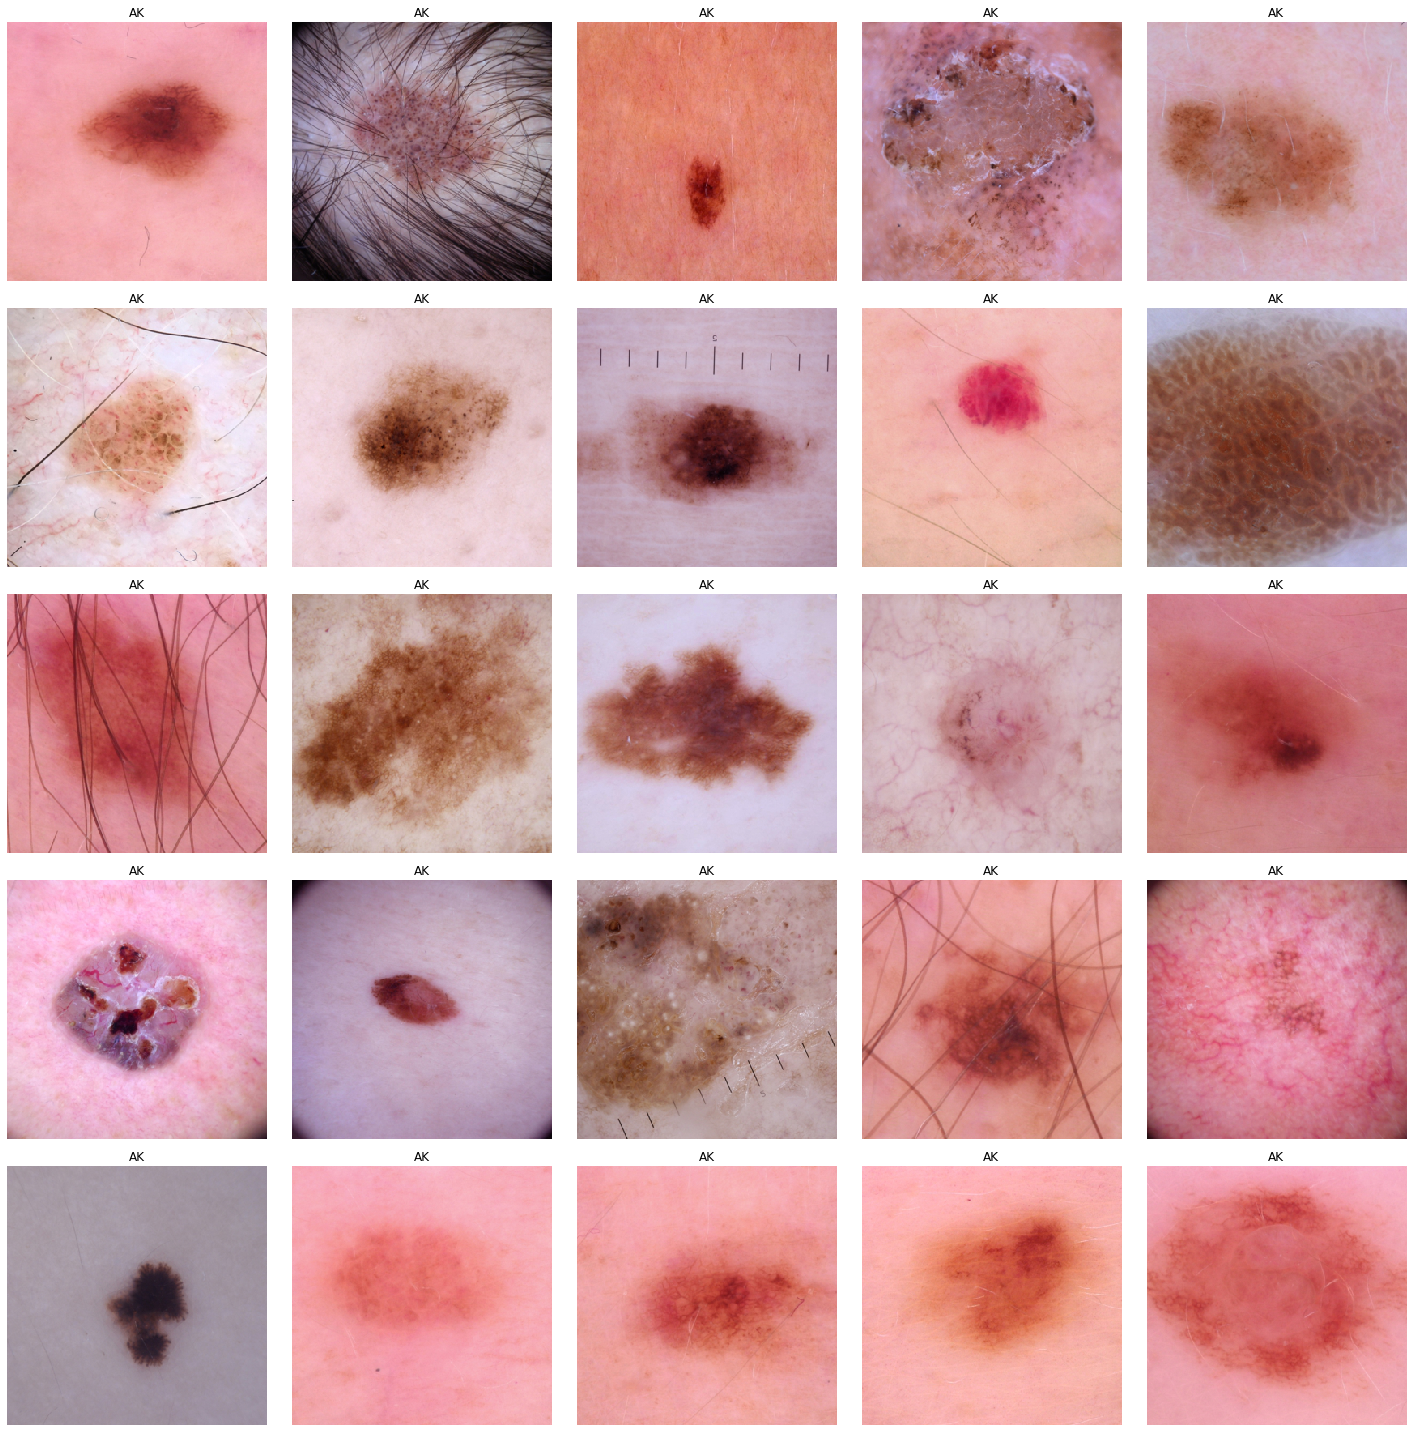

In [108]:
predictor.data.show_batch(ds_type=DatasetType.Test)

In [109]:
preds, y = predictor.TTA(ds_type=DatasetType.Test)

In [110]:
arrOfPreds = [predictor.data.classes[pred.argmax().item()] for pred in preds]; arrOfPreds[0:5]

['NV', 'AK', 'NV', 'BKL', 'NV']

In [111]:
allCategories = predictor.data.classes
cols = ['image'] + allCategories


predictions = []
for idx, filePath in enumerate(predictor.data.test_ds.items):
  row = {}
  current_pred = preds[idx]
  row['image'] = filePath.stem
  for idx2, cat in enumerate(allCategories):
    row[cat] = current_pred[idx2].item()
  
  predictions.append(row)

predictionsDf = pd.DataFrame(predictions, columns=cols);

In [112]:
len(predictionsDf)
predictionsDf = predictionsDf.rename(columns={'AK':'AKIEC'})
predictionsDf.head()

image     AKIEC       BCC       BKL        DF       MEL        NV  \
0  ISIC_0035609  0.000053  0.002979  0.000926  0.001482  0.003740  0.990324   
1  ISIC_0035795  0.727457  0.000169  0.121241  0.000737  0.059607  0.090775   
2  ISIC_0034532  0.000202  0.000017  0.002419  0.000031  0.026250  0.971050   
3  ISIC_0035996  0.052797  0.014110  0.762238  0.036498  0.015797  0.118268   
4  ISIC_0035891  0.002328  0.000251  0.100612  0.000051  0.328960  0.567740   

       VASC  
0  0.000497  
1  0.000013  
2  0.000031  
3  0.000293  
4  0.000058

In [113]:
predictions_csv_path = 'anew.csv'
predictionsDf.to_csv(predictions_csv_path, index=False)